# Project 3
## Xiaonan Hu & Liqi Zhu

## 1. Data Processing

In [4]:
import json as js
import nltk
from nltk.tokenize import *
import numpy as np
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
with open('tweets201712.json', 'r') as f:  
    load_dict = js.load(f)

In [93]:
table = {ord(f):ord(t) for f,t in zip(
     u'，。！？【】（）％＃＠＆１２３４５６７８９０‘’',
     u',.!?[]()%#@&1234567890\'\'')}

In [94]:
sentence = []
for d in load_dict:
    t = d['text']
    sent = sent_tokenize(t)
    for s in sent:
        if 'anymore' in s:
            if '\n' in s:
                for l in s.splitlines():
                    if 'anymore' in l:
                        sentence.append(l.lower().translate(table))
            else:
                sentence.append(s.lower().translate(table))

In [95]:
len(sentence)

70484

In [96]:
sentence[21]

"i just don't see myself getting excited about my birthday anymore  it's just another year to me"

In [97]:
# Saving list to .txt file
fileObject = open('tweets201712.txt', 'w', encoding='ascii', errors='ignore')
for sent in sentence: 
    #print(text,file = fileObject)
    fileObject.write(sent)  
    fileObject.write('\n')  
fileObject.close()  

In [1]:
# Reloading .txt file
with open('tweets201712.txt', 'r') as f:  
    tweets = f.readlines()
print(len(tweets))#, tweets)

70492


In [2]:
sents = []
for t in tweets:
    if 'anymore' in t:
        sents.append(t)
print(len(sents))

70484


## 2. Data Frame

In [5]:
pd.set_option('max_colwidth',500)

In [6]:
# Define Data Frame
df = pd.DataFrame({'Sentence': list(set(sents))})
df

,Sentence
0,sadly i think a deal was done a while ago there's no going back now n tbh i don't think he wants to be here anymore & the last thing we need is players like that #miralles is another who needs moving on asap\n
1,"if you know that you're having relationship problems and that you're the source of them, and you don't want anymore, then fix yourself lmfao it's not that difficult!\n"
2,im giving ip i cant do this to myself anymore\n
3,but these will be the same people fighting for women to be seen as equally strong as men... until it doesn't benefit them anymore.\n
4,what is politics anymore pic.twitter.com/a0lzsqephd\n
5,step 1: i'm not afraid of you anymore.\n
6,the left isn't even trying to hide it anymore.\n
7,"i keep blaming online for rotting my brain and ruining my attention span, but maybe the scary truth is that i just don't find reading books interesting anymore\n"
8,i don't like ur coat anymore hun x\n
9,steampunk'd used to be on netflix but im seeing that its not anymore\n


In [7]:
#df['Polarity','Subjectivity'] = df.apply(lambda x: list(TextBlob(x[0]).sentences[0].sentiment), axis=1)
df['Polarity','Subjectivity'] = ''
df[['Polarity','Subjectivity']] = df.apply(lambda x: list(TextBlob(x[0]).sentences[0].sentiment), axis=1)
df

,Sentence,"(Polarity, Subjectivity)",Polarity,Subjectivity
0,sadly i think a deal was done a while ago there's no going back now n tbh i don't think he wants to be here anymore & the last thing we need is players like that #miralles is another who needs moving on asap\n,,-0.075000,0.291667
1,"if you know that you're having relationship problems and that you're the source of them, and you don't want anymore, then fix yourself lmfao it's not that difficult!\n",,-0.625000,1.000000
2,im giving ip i cant do this to myself anymore\n,,0.000000,0.000000
3,but these will be the same people fighting for women to be seen as equally strong as men... until it doesn't benefit them anymore.\n,,0.216667,0.429167
4,what is politics anymore pic.twitter.com/a0lzsqephd\n,,0.000000,0.000000
5,step 1: i'm not afraid of you anymore.\n,,0.300000,0.900000
6,the left isn't even trying to hide it anymore.\n,,0.000000,0.000000
7,"i keep blaming online for rotting my brain and ruining my attention span, but maybe the scary truth is that i just don't find reading books interesting anymore\n",,0.000000,0.750000
8,i don't like ur coat anymore hun x\n,,0.000000,0.000000
9,steampunk'd used to be on netflix but im seeing that its not anymore\n,,0.000000,0.000000


In [8]:
sid = SentimentIntensityAnalyzer()
df['Polarity_Co'] = df.apply(lambda x: sid.polarity_scores(x[0])['compound'], axis=1)
df
#positive sentiment: compound score >= 0.05
#neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
#negative sentiment: compound score <= -0.05

,Sentence,"(Polarity, Subjectivity)",Polarity,Subjectivity,Polarity_Co
0,sadly i think a deal was done a while ago there's no going back now n tbh i don't think he wants to be here anymore & the last thing we need is players like that #miralles is another who needs moving on asap\n,,-0.075000,0.291667,-0.3612
1,"if you know that you're having relationship problems and that you're the source of them, and you don't want anymore, then fix yourself lmfao it's not that difficult!\n",,-0.625000,1.000000,0.4552
2,im giving ip i cant do this to myself anymore\n,,0.000000,0.000000,0.3400
3,but these will be the same people fighting for women to be seen as equally strong as men... until it doesn't benefit them anymore.\n,,0.216667,0.429167,-0.2547
4,what is politics anymore pic.twitter.com/a0lzsqephd\n,,0.000000,0.000000,0.0000
5,step 1: i'm not afraid of you anymore.\n,,0.300000,0.900000,0.0000
6,the left isn't even trying to hide it anymore.\n,,0.000000,0.000000,-0.1779
7,"i keep blaming online for rotting my brain and ruining my attention span, but maybe the scary truth is that i just don't find reading books interesting anymore\n",,0.000000,0.750000,-0.1027
8,i don't like ur coat anymore hun x\n,,0.000000,0.000000,-0.2755
9,steampunk'd used to be on netflix but im seeing that its not anymore\n,,0.000000,0.000000,0.0000


In [9]:
b = df.Sentence
df['isQuestion']=b.str.contains("\?")
df['isNegativeAnymore']=(b.str.contains("before|prefer|without|surprised|lost|ion|\?|than|rather|less|most|not|no|not|n\'t|nt|idk|idc|idek|idec|idfk|idfc|relactant.*|deny|reject.*|refuse.*|decline.*|repulse.*|impossible|doubt|suspect.*|suspicious|hard|never|rarely|none|no|every|only|barely|scarcely|few|little|only|all|zero|0|if|whether|whatever|whenever|wherever|unless|lest|whoever|than|rather|less|most|except|prevent.*|unlikely|improbable|dislike.*")|b.str.contains("keep&from")|b.str.contains("kept&from")|b.str.contains("too&to")|b.str.contains("est&any")|b.str.contains("est&ever")|b.str.contains("without|except")|b.str.contains("all&but"))
df['OvertNegatives']= b.str.contains("ion|not|no|not|n\'t|nt|idk|idc|idek|idec|idfk|idfc")
df['IncorporatedNegatives']=b.str.contains("lost|prevent.*|unlikely|improbable|dislike.*|relactant|deny|reject.*|refuse.*|decline.*|repulse.*|impossible|doubt|suspect.*|suspicious")
df['NegativeFrequencyAdverbs']=b.str.contains("hard|never|rarely|none|no|every|only|barely|scarcely")
df['Quantifiers&QuantifiedAdverbs']=b.str.contains("few|little|only|all|zero|0")
df['HypotheticalClauses']=b.str.contains("if|whether|whatever|whenever|wherever|unless|lest|whoever")
df['Comparatives,Superlatives,etc.']=(b.str.contains('before|prefer|without|surprised|than|rather|more|less|most')|b.str.contains("est&any")|b.str.contains("est&ever"))
df["*Predicationsof'excess'withToo"]= b.str.contains("too&to")     
df["*NegativePrepositions"]=(b.str.contains("without|except")|b.str.contains("all&but"))
df['EvenUse']=b.str.contains("even")
df['EveryUse']=b.str.contains("every")
df['ModalVerb']=b.str.contains("shall|should|would|must|can|could|might|will|won\'t|wont|might")
df['EverUse']=b.str.contains("ever")

In [10]:
df

,Sentence,"(Polarity, Subjectivity)",Polarity,Subjectivity,Polarity_Co,isQuestion,isNegativeAnymore,OvertNegatives,IncorporatedNegatives,NegativeFrequencyAdverbs,Quantifiers&QuantifiedAdverbs,HypotheticalClauses,"Comparatives,Superlatives,etc.",*Predicationsof'excess'withToo,*NegativePrepositions,EvenUse,EveryUse,ModalVerb,EverUse
0,sadly i think a deal was done a while ago there's no going back now n tbh i don't think he wants to be here anymore & the last thing we need is players like that #miralles is another who needs moving on asap\n,,-0.075000,0.291667,-0.3612,False,True,True,False,True,True,False,True,False,False,False,False,False,False
1,"if you know that you're having relationship problems and that you're the source of them, and you don't want anymore, then fix yourself lmfao it's not that difficult!\n",,-0.625000,1.000000,0.4552,False,True,True,False,True,False,True,True,False,False,False,False,False,False
2,im giving ip i cant do this to myself anymore\n,,0.000000,0.000000,0.3400,False,True,True,False,False,False,False,True,False,False,False,False,True,False
3,but these will be the same people fighting for women to be seen as equally strong as men... until it doesn't benefit them anymore.\n,,0.216667,0.429167,-0.2547,False,True,True,False,False,True,False,True,False,False,False,False,True,False
4,what is politics anymore pic.twitter.com/a0lzsqephd\n,,0.000000,0.000000,0.0000,False,True,False,False,False,True,False,True,False,False,False,False,False,False
5,step 1: i'm not afraid of you anymore.\n,,0.300000,0.900000,0.0000,False,True,True,False,True,False,False,True,False,False,False,False,False,False
6,the left isn't even trying to hide it anymore.\n,,0.000000,0.000000,-0.1779,False,True,True,False,False,False,False,True,False,False,True,False,False,False
7,"i keep blaming online for rotting my brain and ruining my attention span, but maybe the scary truth is that i just don't find reading books interesting anymore\n",,0.000000,0.750000,-0.1027,False,True,True,False,False,False,False,True,False,False,False,False,False,False
8,i don't like ur coat anymore hun x\n,,0.000000,0.000000,-0.2755,False,True,True,False,False,False,False,True,False,False,False,False,False,False
9,steampunk'd used to be on netflix but im seeing that its not anymore\n,,0.000000,0.000000,0.0000,False,True,True,False,True,False,False,True,False,False,False,False,False,False


In [11]:
df.describe()

,Polarity,Subjectivity,Polarity_Co
count,67177.000000,67177.000000,67177.000000
mean,0.036088,0.330572,-0.006077
std,0.278688,0.344339,0.391143
min,-1.000000,0.000000,-0.982400
25%,0.000000,0.000000,-0.275500
50%,0.000000,0.250000,0.000000
75%,0.136364,0.600000,0.258400
max,1.000000,1.000000,0.994800


## 3. Plots

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

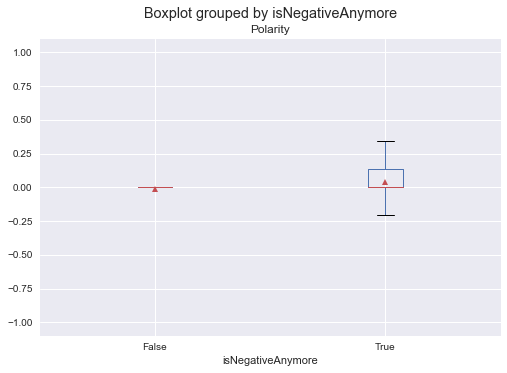

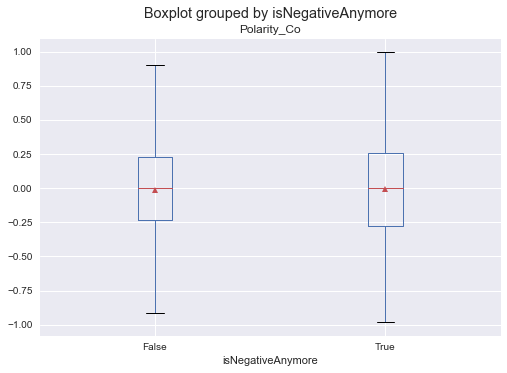

In [13]:
plt.figure()
df.boxplot('Polarity',by='isNegativeAnymore',vert=True,showmeans=True)
df.boxplot('Polarity_Co',by='isNegativeAnymore',vert=True,showmeans=True)
plt.show()

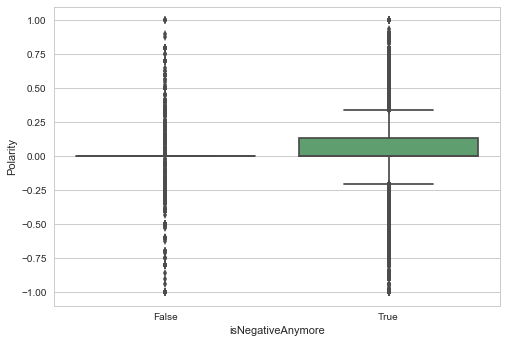

In [19]:
sns.set_style("whitegrid")
sns.boxplot(x="isNegativeAnymore", y="Polarity", data=df)
#sns.swarmplot(x="isNegativeAnymore", y="Polarity", data=df, color=".25")
plt.show()

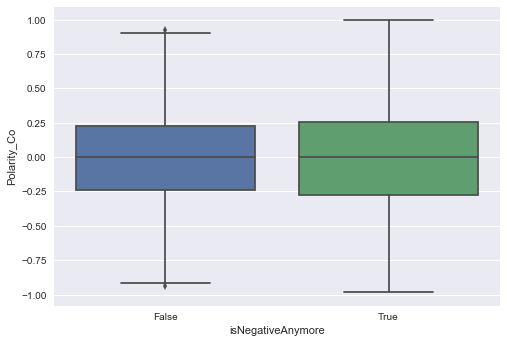

In [14]:
sns.boxplot(x="isNegativeAnymore", y="Polarity_Co", data=df)
plt.show()

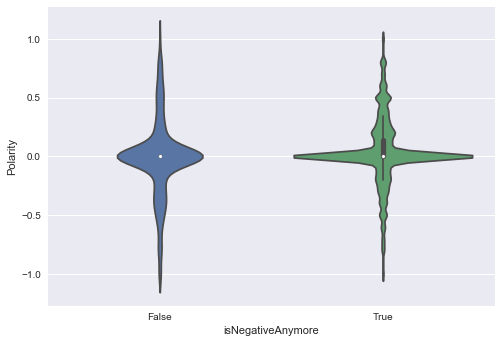

In [16]:
sns.violinplot(x="isNegativeAnymore", y="Polarity", data=df)
plt.show()

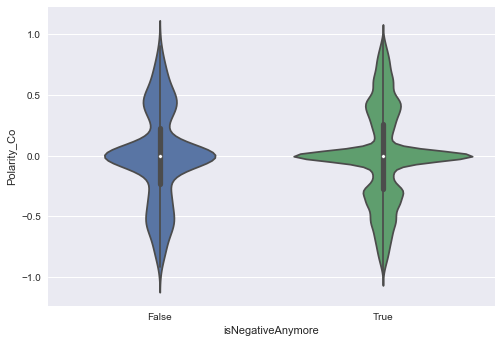

In [17]:
sns.violinplot(x="isNegativeAnymore", y="Polarity_Co", data=df)
plt.show()

In [18]:
T_p = df[df['isNegativeAnymore'] == True]['Polarity']
F_p = df[df['isNegativeAnymore'] == False]['Polarity']
stats.ttest_ind(T_p, F_p)

Ttest_indResult(statistic=5.8339403122782958, pvalue=5.4380895859943053e-09)

In [32]:
np.mean(F_p),np.mean(T_p)

(-0.012608019493854348, 0.036896055041249126)

In [19]:
T_pC = df[df['isNegativeAnymore'] == True]['Polarity_Co']
F_pC = df[df['isNegativeAnymore'] == False]['Polarity_Co']
stats.ttest_ind(T_pC, F_pC)

Ttest_indResult(statistic=0.43792274693284838, pvalue=0.66144369364082345)

In [31]:
np.mean(F_pC),np.mean(T_pC)

(-0.011208394160583935, -0.005991620889514777)

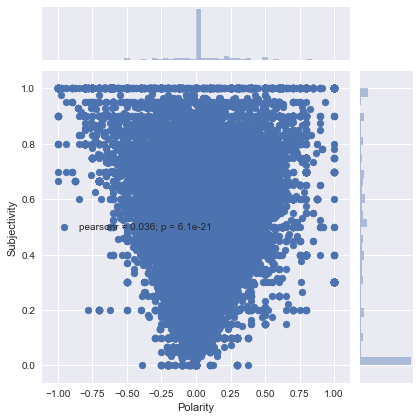

In [20]:
sns.jointplot(x="Polarity", y="Subjectivity", data=df)
plt.show()